In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime


In [2]:
# Take in all of our movies and ratings csvs and read it into pandas
movies = "Resources/ml-latest-small/movies.csv"
ratings = "Resources/ml-latest-small/ratings.csv"
movies_df = pd.read_csv(movies)
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Extract the release year from the title column
movies_df["release_year"] = movies_df["title"].str.extract(r'\((\d{4})\)')

# Remove the year from the title column
movies_df["title"] = movies_df["title"].str.replace(r" \(\d{4}\)", "", regex=True)

# Display the updated DataFrame
movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [4]:
#cleaning up the genres column to a list instead of a string
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|') )
movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [5]:
#counting the most frequent genre in our dataset 
from collections import Counter

genre_frequency = Counter(g for genres in movies_df['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [6]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


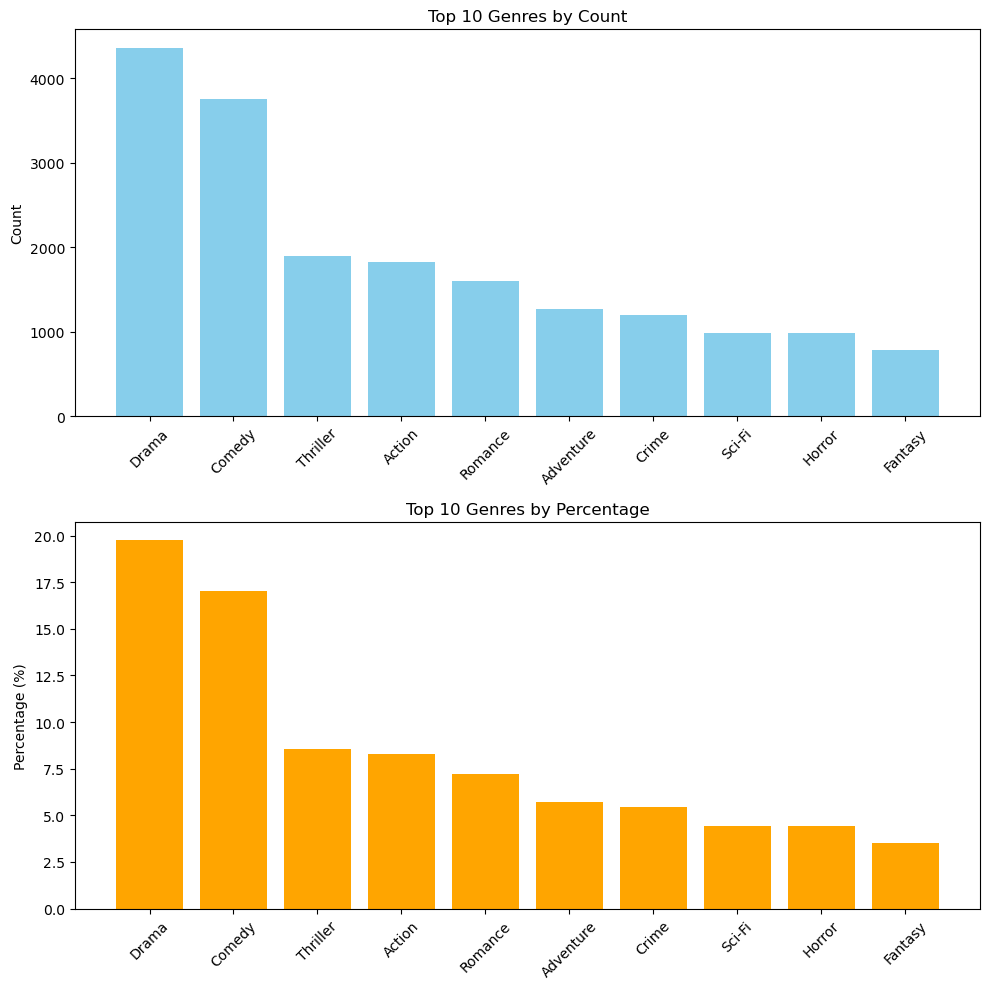

In [7]:
# Convert the Counter to a sorted list of tuples (genre, count)
sorted_genres = genre_frequency.most_common()

# Select the top 10 genres
top_10_genres = sorted_genres[:10]
genres, counts = zip(*top_10_genres)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# First bar chart: Genre count
axs[0].bar(genres, counts, color='skyblue')
axs[0].set_title('Top 10 Genres by Count')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Second bar chart: Genre distribution (normalized counts)
normalized_counts = [count / sum(genre_frequency.values()) * 100 for count in counts]
axs[1].bar(genres, normalized_counts, color='orange')
axs[1].set_title('Top 10 Genres by Percentage')
axs[1].set_ylabel('Percentage (%)')
axs[1].tick_params(axis='x', rotation=45)

# Adjust spacing
plt.tight_layout()
plt.show()

In [8]:
ratings_df = pd.read_csv(ratings)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# Merge the DataFrames on movieId
consolidated_movies_df = movies_df.merge(ratings_df, on = 'movieId', how ='inner')
consolidated_movies_df.head()

,movieId,title,genres,release_year,userId,rating,timestamp
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


In [10]:
# Convert timestamp to year and store in a new column `rating_year`
consolidated_movies_df['rating_year'] = consolidated_movies_df['timestamp'].apply(
    lambda x: datetime.utcfromtimestamp(x).year
)

# Display the DataFrame
consolidated_movies_df.head()

,movieId,title,genres,release_year,userId,rating,timestamp,rating_year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703,2000
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962,1996
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946,2005
3,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970,2017
4,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483,2011


In [11]:
consolidated_movies_df.dtypes

movieId           int64
title            object
genres           object
release_year     object
userId            int64
rating          float64
timestamp         int64
rating_year       int64
dtype: object

In [12]:
print(consolidated_movies_df.isnull().sum())

movieId          0
title            0
genres           0
release_year    18
userId           0
rating           0
timestamp        0
rating_year      0
dtype: int64


**Data Preprocessing**:

*Collaborative Filtering* 

We will use a method called collaborative filtering to generate user recommendations. This approach operates on the principle that individuals with similar preferences tend to enjoy similar items.

The first step involves converting our dataset into a user-item matrix, also referred to as a "utility matrix." In this matrix, each row corresponds to a user, and each column represents a movie. A key advantage of collaborative filtering is its ability to generate recommendations without relying on additional information about the users or the items.

The create_X() function produces a sparse matrix along with four mapping dictionaries:

user_mapper: Maps user IDs to their corresponding row indices.

movie_mapper: Maps movie IDs to their corresponding column indices.

user_inv_mapper: Maps row indices back to user IDs.

movie_inv_mapper: Maps column indices back to movie IDs.

These dictionaries are essential for linking the rows and columns of the utility matrix to their respective user and movie IDs.

The resulting user-item matrix is a scipy.sparse.csr_matrix, designed to efficiently store and handle sparse data.


In [13]:
import numpy as np
from scipy.sparse import csr_matrix

def create_X(consolidated_movies_df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        consolidated_movies_df: pandas dataframe containing columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict mapping user id's to user indices
        user_inv_mapper: dict mapping user indices to user id's
        movie_mapper: dict mapping movie id's to movie indices
        movie_inv_mapper: dict mapping movie indices to movie id's
    """
    # Number of unique users and movies
    M = consolidated_movies_df['userId'].nunique()
    N = consolidated_movies_df['movieId'].nunique()

    # Mapping dictionaries
    user_mapper = dict(zip(np.unique(consolidated_movies_df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(consolidated_movies_df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(consolidated_movies_df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(consolidated_movies_df["movieId"])))
    
    # Map user and movie IDs to their matrix indices
    user_index = [user_mapper[i] for i in consolidated_movies_df['userId']]
    item_index = [movie_mapper[i] for i in consolidated_movies_df['movieId']]

    # Create the sparse matrix
    X = csr_matrix((consolidated_movies_df["rating"], (user_index, item_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

# Example usage
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(consolidated_movies_df)

In [14]:
X.shape

(610, 9724)

Our X matrix contains 610 users and 9724 movies

Evaluating Sparsity : Evaluating sparsity in collaborative filtering models is essential to address data challenges, improve performance, and ensure effective recommendations. Sparse data limits the system's ability to learn preferences, exacerbates cold start issues, and risks overfitting or biasing predictions. It influences algorithm suitability, often favoring matrix factorization over neighborhood-based methods, and highlights the need for hybrid approaches. Sparse datasets also demand efficient computational structures and can complicate optimization. Understanding sparsity aids in refining data collection, imputation, and preprocessing strategies, while revealing user behavior and item popularity trends. This evaluation is vital for designing robust, scalable recommendation systems. Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix ([nnz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.nnz.html)) is equivalent to the number of ratings in our dataset.

In [15]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


Usually a sparsity of 0.1 or above we are good to use this method of collaborative filtering else we have to use the Content based filtering. The **cold start problem** is when there are new users and movies in our matrix that do not have any ratings. In our Movielens dataset, all users and movies have at least one rating but in general, it's useful to check which users and movies have few interactions.

In [16]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

610

In [17]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 2698 movies.
Least active user rated 20 movies.


In [18]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

In [19]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 329 ratings.
Least rated movie has 1 ratings.


We will be Implementing Collaborative Filtering using the K-Nearest Neighbors algorithm, considering that the matrix is dense, to identify movies with similar user engagement patterns

In [20]:
from sklearn.neighbors import NearestNeighbors

# def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
#     """
#     Finds k-nearest neighbors for a given movie id.
    
#     Args:
#         movie_id: id of the movie of interest
#         X: user-item utility matrix
#         k: number of similar movies to retrieve
#         metric: distance metric for kNN calculations
    
#     Output: returns list of k similar movie ID's
#     """
#     X = X.T
#     neighbour_ids = []
    
#     movie_ind = movie_mapper[movie_id]
#     movie_vec = X[movie_ind]
#     if isinstance(movie_vec, (np.ndarray)):
#         movie_vec = movie_vec.reshape(1,-1)
#     # use k+1 since kNN output includes the movieId of interest
#     kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
#     kNN.fit(X)
#     neighbour = kNN.kneighbors(movie_vec, return_distance=False)
#     for i in range(0,k):
#         n = neighbour.item(i)
#         neighbour_ids.append(movie_inv_mapper[n])
#     neighbour_ids.pop(0)
#     return neighbour_ids

In [21]:
# ARIELMY ATTEMPT TO ADD USER INPUT TO ABOVE
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbors for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0, k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids


find_similar_movies() takes in a movieId and X matrix, and outputs a list of

movies that are similar to the movieId of interest.

Let's see how it works in action. We will first create another mapper that maps movieId to title so that our results are interpretable.

In [22]:
# similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
# similar_movies

In [23]:
# ARIELMY: HELP USER SEARCH FOR THEIR MOVIE ID TO USE IN NEXT STEP


In [24]:
# Get user input for movie_id and k
user_movie_id = int(input("Enter the movie ID: "))
user_k = int(input("Enter the number of similar movies to retrieve (k): "))

# Assuming X, movie_mapper, and movie_inv_mapper are already defined
similar_movies = find_similar_movies(user_movie_id, X, movie_mapper, movie_inv_mapper, k=user_k)
print("Similar Movies:", similar_movies)

Enter the movie ID:  1
Enter the number of similar movies to retrieve (k):  5


Similar Movies: [3114, 480, 780, 260]


find_similar_movies() returns a list of movieId's that are most similar to your movie of interest. Let's convert these id's to titles so that we can interpret our results. To make things easier, we will create a dictionary that maps movieId to title.

In [25]:
movie_titles = dict(zip(consolidated_movies_df['movieId'], consolidated_movies_df['title']))
#movie_titles
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story:
Toy Story 2
Jurassic Park
Independence Day (a.k.a. ID4)
Star Wars: Episode IV - A New Hope
Forrest Gump
Lion King, The
Star Wars: Episode VI - Return of the Jedi
Mission: Impossible
Groundhog Day


In [15]:
# Save the DataFrame to a CSV file
consolidated_movies_df.to_csv('consolidated_movies.csv', index=False)

In [16]:
# Analysis on Data
# Count of Unique users and movies
print("Number of unique movies:", consolidated_movies_df['movieId'].nunique())
print("Number of unique users:", consolidated_movies_df['userId'].nunique())


Number of unique movies: 9724
Number of unique users: 610


In [17]:
#what are the average ratings per movie
average_ratings = consolidated_movies_df.groupby('movieId')['rating'].mean()
print(average_ratings.head())


movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64


In [ ]:
# Take in the tags csv and read it into pandas
tags = "Resources/ml-latest-small/tags.csv"
tags_df = pd.read_csv(tags)
tags_df.head()

In [ ]:
# Merge the DataFrames on movieId with tags 
tags_movies_df = consolidated_movies_df.merge(tags_df , on = 'movieId', how ='outer')
tags_movies_df.head()